# Задание
1. Обучить генератор создавать точки, которые будут лежать на графике функции 
 $$y = \frac{sin(x)}{x} - \frac{x}{10}$$
При выполнении данного задания структура GAN остается той же, но Вам нужно:
- Сгенерировать настоящие данные
- Изменить архитектуру дискриминатора и генератора
- Построить графики

In [1]:
import numpy as np

from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from torchvision import datasets
from torch.autograd import Variable

import torch.nn as nn
import torch

import matplotlib.pyplot as plt
from torchvision.utils import save_image, make_grid

In [2]:
train_data_length = 1024
train_data = torch.zeros((train_data_length, 2))
train_data[:, 0] = torch.randn(train_data_length)
train_data[:, 1] = (torch.sin(train_data[:, 0])/ (train_data[:, 0])) - ((train_data[:, 0])/10)


In [3]:
train_data

tensor([[-1.0363,  0.9340],
        [ 0.5083,  0.9067],
        [ 0.2041,  0.9727],
        ...,
        [-1.4364,  0.8336],
        [ 0.8709,  0.7912],
        [ 1.5702,  0.4798]])

In [4]:
train_labels = torch.zeros(train_data_length)
train_set = [
    (train_data[i], train_labels[i]) for i in range(train_data_length)]

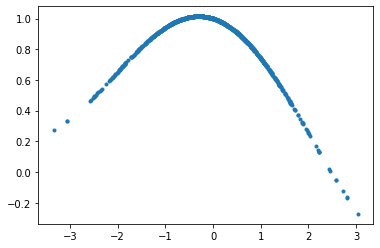

In [5]:

plt.plot(train_data[:, 0], train_data[:, 1], ".")

In [6]:
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=batch_size, shuffle=True)

### Класс дискриминатора

In [7]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 256),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),
            nn.Sigmoid())

    def forward(self, x):
        output = self.model(x)
        return output

### Генератор

In [8]:
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 2))

    def forward(self, x):
        output = self.model(x)
        return output

In [9]:
# Функция для вывода и сохранения изображения
def sample_image(static_sample, save_img = False):
    npimg = make_grid(static_sample.data[:25]).numpy()
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(np.transpose(npimg, (1,2,0)), interpolation="nearest")
    if save_img:
        save_image(gen_imgs.data[:25], f"images/{batches_done}.png", nrow=5, normalize=True)

## Обучение

In [10]:
lr = 0.001
num_epochs = 300
loss_function = torch.nn.BCELoss()

In [11]:
generator = Generator()
discriminator = Discriminator()

# Для каждой нейронки свой опитимизатор
optimizer_discriminator = torch.optim.Adam(discriminator.parameters(), lr=lr)
optimizer_generator = torch.optim.Adam(generator.parameters(), lr=lr)

In [12]:
for epoch in range(num_epochs):
    for n, (real_samples, _) in enumerate(train_loader):
      
        # Данные для обучения дискриминатора
        real_samples_labels = torch.ones((batch_size, 1))
        latent_space_samples = torch.randn((batch_size, 2))
        generated_samples = generator(latent_space_samples)
        generated_samples_labels = torch.zeros((batch_size, 1))
        all_samples = torch.cat((real_samples, generated_samples))
        all_samples_labels = torch.cat(
            (real_samples_labels, generated_samples_labels))

        # Обучение дискриминатора
        discriminator.zero_grad()
        output_discriminator = discriminator(all_samples)
        loss_discriminator = loss_function(
            output_discriminator, all_samples_labels)
        loss_discriminator.backward()
        optimizer_discriminator.step()

        # Данные для обучения генератора
        latent_space_samples = torch.randn((batch_size, 2))

        # Обучение генератора
        generator.zero_grad()
        generated_samples = generator(latent_space_samples)
        output_discriminator_generated = discriminator(generated_samples)
        loss_generator = loss_function(
            output_discriminator_generated, real_samples_labels)
        loss_generator.backward()
        optimizer_generator.step()

        # Выводим значения функций потерь
        if epoch % 10 == 0 and n == batch_size - 1:
            print(f"Epoch: {epoch} Loss D.: {loss_discriminator}")
            print(f"Epoch: {epoch} Loss G.: {loss_generator}") 

Epoch: 0 Loss D.: 0.0465419664978981
Epoch: 0 Loss G.: 3.3766403198242188
Epoch: 10 Loss D.: 0.6095421314239502
Epoch: 10 Loss G.: 0.9111297130584717
Epoch: 20 Loss D.: 0.6854917407035828
Epoch: 20 Loss G.: 0.7817936539649963
Epoch: 30 Loss D.: 0.7078153491020203
Epoch: 30 Loss G.: 0.7398874163627625
Epoch: 40 Loss D.: 0.6915898323059082
Epoch: 40 Loss G.: 0.6850014925003052
Epoch: 50 Loss D.: 0.6973488330841064
Epoch: 50 Loss G.: 0.7007993459701538
Epoch: 60 Loss D.: 0.6928293704986572
Epoch: 60 Loss G.: 0.6847332715988159
Epoch: 70 Loss D.: 0.6910754442214966
Epoch: 70 Loss G.: 0.7156433463096619
Epoch: 80 Loss D.: 0.6863064169883728
Epoch: 80 Loss G.: 0.6916754245758057
Epoch: 90 Loss D.: 0.6934481263160706
Epoch: 90 Loss G.: 0.6943314671516418
Epoch: 100 Loss D.: 0.6930143237113953
Epoch: 100 Loss G.: 0.6932869553565979
Epoch: 110 Loss D.: 0.6963474154472351
Epoch: 110 Loss G.: 0.7035662531852722
Epoch: 120 Loss D.: 0.6961037516593933
Epoch: 120 Loss G.: 0.6889955401420593
Epoch: 1

## Проверка образцов, сгенерированных GAN

In [13]:
latent_space_samples = torch.randn(500, 2)
generated_samples = generator(latent_space_samples)

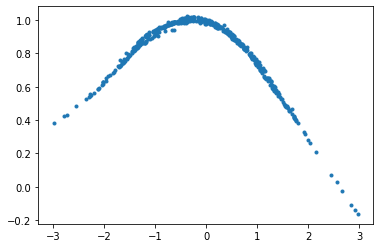

In [14]:
generated_samples = generated_samples.detach()
plt.plot(generated_samples[:, 0], generated_samples[:, 1], ".")